# What is the relation between shark attacks, seasons and human activity? 
  ###  - Seasonality of the attacks
  ###  - Human activity vs shark attack
  ###  - Activity vs fatal shark attack

In [46]:
import pandas as pd
import re
import matplotlib.pyplot as plt

In [47]:
#import data into python
df=pd.read_csv('/Users/jidekickpush/Documents/GitHub/0323_2020DATAPAR/Labs/module_1/Pipelines-Project/Data/GSAF5.csv', encoding ='cp1252')

#Table overview
#df.head()

In [48]:
#Check data types
df.dtypes

Case Number               object
Date                      object
Year                       int64
Type                      object
Country                   object
Area                      object
Location                  object
Activity                  object
Name                      object
Sex                       object
Age                       object
Injury                    object
Fatal (Y/N)               object
Time                      object
Species                   object
Investigator or Source    object
pdf                       object
href formula              object
href                      object
Case Number.1             object
Case Number.2             object
original order             int64
Unnamed: 22               object
Unnamed: 23               object
dtype: object

### From the table overview, we can see the following statements:
* columns 'unnamed: 22' and 'unnamed: 23' are not referenced in the description of the dataset and doesn't contain any (relevant) information.
* columns 'Case Number.1' and 'Case Number.2'are duplicates of 'Case Number'
* columns 'date' cannot be nomalised cause of the differents syntaxes but the information can be extract from column 'Case Number'
* Non information relevant columns for the study:
* 'Type','Name', 'Sex ','Age','Injury','Time','Species ','Investigator or Source','pdf','href formula', 'href'
 * warning : name colunm 'Sex '  and 'Species ' has a space after the name

In [49]:
null_cols = df.isnull().sum()
null_cols
null_cols[null_cols > 0]

Country                     43
Area                       402
Location                   496
Activity                   527
Name                       200
Sex                        567
Age                       2681
Injury                      27
Fatal (Y/N)                 19
Time                      3213
Species                   2934
Investigator or Source      15
href formula                 1
href                         3
Unnamed: 22               5991
Unnamed: 23               5990
dtype: int64

In [50]:
df=df.drop(['Unnamed: 22','Unnamed: 23','Case Number.1','Case Number.2','Date','Type','Name', 'Sex ','Age','Injury','Time','Species ','Investigator or Source','pdf','href formula', 'href'], axis=1)
#df

### Column. renaming
#### Some values of the columns 'Country' aren't clear enough, proceed to rename by 'Place', since several entrances refer to seas or regions broader than a country.
#### Rename column 'original order' as 'Id'

In [51]:
df.rename(columns={'original order':'Id','Country':'Place'}, inplace = True)
#df

### Among the total 5900 events registered, to evaluate only statistically relevant data, events registered before 1900 will not be considered

In [52]:
df=df[df['Year']>1900]
#df

In [53]:
df.shape

(5311, 8)

### Data string cleaning an all df
* remove end ?
* remove start/end blank spaces

In [54]:
df.replace(regex={
    r'\?':'', 
    r'\s\/\s[A-Z\s]+': '', 
    r'\s$':'', r'^\s':''
}, inplace=True)

## Normalizing column Activity
 * Check how many rows are empty and replace them by 'Not Identified'
 * Get the most common words from the activities in thee way to reduce from the original 1418 unique values into 9  activities:
        * 'Surfing', 'Fishing', 'Bathing', 'Swimming', 'Snorkeling','Others', 'Not_Identify', 'Diving', 'Boating'

In [55]:
df['Activity'] = df['Activity'].fillna('Not_Identified')

In [56]:
activity_list = df['Activity'].value_counts()
activity_list
#print(len(activity_list))
#print(activity_list[0:60])

Surfing                                                                                                                                                            904
Swimming                                                                                                                                                           755
Not_Identified                                                                                                                                                     425
Fishing                                                                                                                                                            377
Spearfishing                                                                                                                                                       324
                                                                                                                                                                  ...

In [57]:
print(len(df['Activity'].unique()))

1271


In [58]:
from collections import Counter
list_of_words = df['Activity'].values.tolist()
l_w = [str(i) for i in list_of_words]
', '.join(l_w)
Counter = Counter(l_w)
most_occur = Counter.most_common(20)
most_occur

[('Surfing', 904),
 ('Swimming', 755),
 ('Not_Identified', 425),
 ('Fishing', 377),
 ('Spearfishing', 324),
 ('Wading', 140),
 ('Diving', 105),
 ('Standing', 92),
 ('Snorkeling', 76),
 ('Scuba diving', 74),
 ('Bathing', 74),
 ('Body boarding', 55),
 ('Body surfing', 50),
 ('Treading water', 32),
 ('Kayaking', 30),
 ('Boogie boarding', 28),
 ('Free diving', 25),
 ('Pearl diving', 22),
 ('Windsurfing', 18),
 ('Surf skiing', 18)]

In [14]:
df.rename(columns={'Activity':'unActivity'}, inplace=True)
df_activity = df['unActivity']
activity = []
for a in df_activity:
    if re.search(r'Not_y[\w\s\,]+|Not_[\w\s\,]+|[\w\s\,]+Not_[\w\s\,]+', str(a)):
        a = 'Not_Identified'
    elif re.search(r'Surf[\w\s\,]+|surf[\w\s\,]+|[\w\s\,]+surf[\w\s\,]+', str(a)):
        a = 'Surfing'
    elif re.search(r'Board[\w\s\,]+|board[\w\s\,]+|[\w\s\,]+board[\w\s\,]+', str(a)):
        a = 'Surfing'
    elif re.search(r'Fish[\w\s\,]+|fish[\w\s\,]+|[\w\s\,]+fish[\w\s\,]+', str(a)):
        a = 'Fishing'
    elif re.search(r'Spear[\w\s\,]+|spear[\w\s\,]+|[\w\s\,]+spear[\w\s\,]+', str(a)):
        a = 'Fishing'
    elif re.search(r'Swim[\w\s\,]+|swim[\w\s\,]+|[\w\s\,]+swim[\w\s\,]+', str(a)):
        a = 'Swimming'
    elif re.search(r'Bath[\w\s\,]+|bath[\w\s\,]+|[\w\s\,]+bath[\w\s\,]+', str(a)):
        a = 'Bathing'
    elif re.search(r'Wadi[\w\s\,]+|wadi[\w\s\,]+|[\w\s\,]+wadi[\w\s\,]+', str(a)):
        a = 'Bathing'
    elif re.search(r'Snor[\w\s\,]+|snor[\w\s\,]+|[\w\s\,]+snor[\w\s\,]+', str(a)):
        a = 'Snorkeling'
    elif re.search(r'Div[\w\s\,]+|div[\w\s\,]+|[\w\s\,]+div[\w\s\,]+', str(a)):
        a = 'Diving'
    elif re.search(r'Boat[\w\s\,]+|boat[\w\s\,]+|[\w\s\,]+boat[\w\s\,]+', str(a)):
        a = 'Boating'
    elif re.search(r'Sail[\w\s\,]+|sail[\w\s\,]+|[\w\s\,]+sail[\w\s\,]+', str(a)):
        a = 'Boating'
    elif re.search(r'Crui[\w\s\,]+|crui[\w\s\,]+|[\w\s\,]+crui[\w\s\,]+', str(a)):
        a = 'Boating'
    else: a = 'Others'
    activity.append(a)
df['Activity'] = activity
df = df.drop(['unActivity'], axis=1)

#### Check the proportion of the activity and decision to do not keep 'Not_Identify' category as the represent less than 10% of the data

In [15]:
Relevant_activity_check=df['Activity'].value_counts(normalize=True) * 100
Relevant_activity_check

Surfing           25.381284
Fishing           19.638486
Swimming          16.720015
Others            14.987761
Diving             8.265863
Not_Identified     8.002259
Bathing            4.500094
Snorkeling         1.468650
Boating            1.035587
Name: Activity, dtype: float64

In [16]:
# Get 'Not_Identified' of indexes for which column month has value 00
indexActivity = df[ df['Activity'] == 'Not_Identified' ].index
 
# Delete these row indexes from dataFrame
df.drop(indexActivity , inplace=True)

In [17]:
#df['Activity'].unique()

In [18]:
from collections import Counter
list_of_words2 = df['Activity'].values.tolist()
l_w2 = [str(i) for i in list_of_words2]
', '.join(l_w2)
Counter2 = Counter(l_w2)
most_occur2 = Counter2.most_common(100)
most_occur2

[('Surfing', 1348),
 ('Fishing', 1043),
 ('Swimming', 888),
 ('Others', 796),
 ('Diving', 439),
 ('Bathing', 239),
 ('Snorkeling', 78),
 ('Boating', 55)]

## Create a new column for dates, extracting the information from the column 'Case Number'
* check if percentage of unrelevant dates : month missing in the data
=> drop the rows without specified month (00)

In [19]:
df['Date']=df['Case Number']
df['Date'].replace(regex = {r'.[A-Za-z]$':''}, inplace = True)

## Create a column 'Month' in order to create bins for the season later

In [20]:
df['Month']=[m[5:7] for m in df['Case Number']]
df['Month'].astype(int)

0       9
1       9
2       9
3       9
4       9
       ..
5307    7
5308    6
5309    6
5310    1
5311    0
Name: Month, Length: 4886, dtype: int64

In [21]:
null_month_check=df['Month'].value_counts(normalize=True) * 100
null_month_check

07    10.929185
08    10.130986
09     9.230454
01     8.575522
06     8.248056
10     7.552190
12     7.101924
04     7.081457
03     6.938191
11     6.692591
02     6.426525
05     6.385591
00     4.707327
Name: Month, dtype: float64

#### Percentage of month not specified in the df is less than 10%, I decided to do not keep them:

In [22]:
# Get 'Months' of indexes for which column month has value 00
indexMonth = df[ df['Month'] == '00' ].index
 
# Delete these row indexes from dataFrame
df.drop(indexMonth , inplace=True)

## Reformating 'Fatal' column
* Change column types
* Change the column Fatal (Y/N) to a boolean, normalizing all the entries to True or False.
* The few unknown values have been trated as non fatal.

In [23]:
df['Fatal (Y/N)'].value_counts()

N          3613
Y          1007
UNKNOWN      28
Name: Fatal (Y/N), dtype: int64

In [31]:
df.rename(columns={ 'Fatal (Y/N)' : 'Fatal'}, inplace=True)
df = df.replace({'Fatal': { 'N' : '0', 'Y' : '1', 'n' : '0', 'y' : '1', 'UNKNOWN' : '0', 'F' : '0', '#VALUE!' : '0'}})
df['Fatal'].astype(bool)

0       True
1       True
2       True
3       True
4       True
        ... 
5306    True
5307    True
5308    True
5309    True
5310    True
Name: Fatal, Length: 4656, dtype: bool

In [25]:
df

,Case Number,Year,Place,Area,Location,Fatal,Id,Activity,Date,Month
0,2016.09.18.c,2016,USA,Florida,"New Smyrna Beach, Volusia County",0,5993,Surfing,2016.09.18,09
1,2016.09.18.b,2016,USA,Florida,"New Smyrna Beach, Volusia County",0,5992,Surfing,2016.09.18,09
2,2016.09.18.a,2016,USA,Florida,"New Smyrna Beach, Volusia County",0,5991,Surfing,2016.09.18,09
3,2016.09.17,2016,AUSTRALIA,Victoria,Thirteenth Beach,0,5990,Surfing,2016.09.17,09
4,2016.09.15,2016,AUSTRALIA,Victoria,Bells Beach,0,5989,Surfing,2016.09.15,09
...,...,...,...,...,...,...,...,...,...,...
5306,1901.07.30,1901,SOUTH AFRICA,Western Cape Province,Windmill Beach,1,687,Swimming,1901.07.30,07
5307,1901.07.17,1901,ITALY,Syracuse,Capo Santa Croce,NaN,686,Swimming,1901.07.17,07
5308,1901.06.29.R,1901,YEMEN,Aden,NaN,0,685,Diving,1901.06.29,06
5309,1901.06.24,1901,PHILIPPINES,Western Viscayas,"Island of Panay, Iliolo",0,684,Swimming,1901.06.24,06


# Final Table¶
9 columns with categorized data selected to further analysis.
* Reordered for a better lecture
* Decide to do not use the column 'Case Number' for the final_table

In [26]:
df = df[['Id','Date', 'Year', 'Month', 'Place', 'Area','Location', 'Activity', 'Fatal']]
#final_table.to_csv("/Users/jidekickpush/Documents/GitHub/0323_2020DATAPAR/Labs/module_1/Pipelines-Project/output/cleaned_df_GSAF5.csv")
display(df)

,Id,Date,Year,Month,Place,Area,Location,Activity,Fatal
0,5993,2016.09.18,2016,09,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,0
1,5992,2016.09.18,2016,09,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,0
2,5991,2016.09.18,2016,09,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,0
3,5990,2016.09.17,2016,09,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,0
4,5989,2016.09.15,2016,09,AUSTRALIA,Victoria,Bells Beach,Surfing,0
...,...,...,...,...,...,...,...,...,...
5306,687,1901.07.30,1901,07,SOUTH AFRICA,Western Cape Province,Windmill Beach,Swimming,1
5307,686,1901.07.17,1901,07,ITALY,Syracuse,Capo Santa Croce,Swimming,NaN
5308,685,1901.06.29,1901,06,YEMEN,Aden,NaN,Diving,0
5309,684,1901.06.24,1901,06,PHILIPPINES,Western Viscayas,"Island of Panay, Iliolo",Swimming,0


In [27]:
df.shape

(4656, 9)

# Now can proceed to the analysis

#### Binning the data by season on a new column

In [35]:
season_labels=['Winter','Spring','Summer','Fall']
cutoffs= ['00','04','07','10','12']
bins = pd.cut(df['Month'], cutoffs, labels=season_labels)
df['Season']=bins
df

,Case Number,Year,Place,Area,Location,Fatal,Id,Activity,Date,Month,Season
0,2016.09.18.c,2016,USA,Florida,"New Smyrna Beach, Volusia County",0,5993,Surfing,2016.09.18,09,Summer
1,2016.09.18.b,2016,USA,Florida,"New Smyrna Beach, Volusia County",0,5992,Surfing,2016.09.18,09,Summer
2,2016.09.18.a,2016,USA,Florida,"New Smyrna Beach, Volusia County",0,5991,Surfing,2016.09.18,09,Summer
3,2016.09.17,2016,AUSTRALIA,Victoria,Thirteenth Beach,0,5990,Surfing,2016.09.17,09,Summer
4,2016.09.15,2016,AUSTRALIA,Victoria,Bells Beach,0,5989,Surfing,2016.09.15,09,Summer
...,...,...,...,...,...,...,...,...,...,...,...
5306,1901.07.30,1901,SOUTH AFRICA,Western Cape Province,Windmill Beach,1,687,Swimming,1901.07.30,07,Spring
5307,1901.07.17,1901,ITALY,Syracuse,Capo Santa Croce,NaN,686,Swimming,1901.07.17,07,Spring
5308,1901.06.29.R,1901,YEMEN,Aden,NaN,0,685,Diving,1901.06.29,06,Spring
5309,1901.06.24,1901,PHILIPPINES,Western Viscayas,"Island of Panay, Iliolo",0,684,Swimming,1901.06.24,06,Spring


### Let's consider a specific year

In [36]:
year=2005
#year=int(input('Enter the year: '))

## 1st view: Seasonality of the attacks

In [37]:
seasonality = df.pivot_table(index=['Season'], values=['Date'], aggfunc= len,fill_value=0)
seasonality = seasonality.rename(columns= {'Date':'Count'})
seasonality['Ratio'] = seasonality['Count'] * 100 / seasonality['Count'].sum()
seasonality = seasonality.round({'Ratio':2})
df_view1 = seasonality.T
display(df_view1)

Season,Winter,Spring,Summer,Fall
Count,1418.00,1249.00,1315.00,674.00
Ratio,30.46,26.83,28.24,14.48


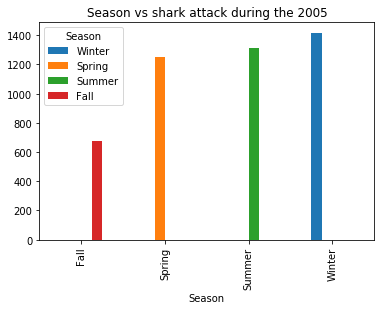

In [38]:
df.groupby('Season')['Season']\
    .value_counts()\
    .unstack(level=0)\
    .plot.bar(stacked=False)
plt.title(f"Season vs shark attack during the {year}")
plt.show()

## 2nd view: indexing the attacks by Activities and Seasons

#### Ratio of attacks per Season

In [39]:
activity_season = df.pivot_table(index=['Activity', 'Season'], values=['Date'], aggfunc= len, fill_value=0) 
activity_season = activity_season.rename(columns= {'Date' : 'Count'})
activity_season['Ratio'] = activity_season['Count'] * 100 / activity_season['Count'].sum() 
activity_season = activity_season.round({'Ratio' : 2})
activity_season.sort_values(by=['Activity','Ratio'], ascending=False, inplace=True)
df_view2 = activity_season.T
display(df_view2)

Activity Swimming                        Surfing                         \
Season     Winter  Spring Summer    Fall  Summer Winter  Spring    Fall   
Count      257.00  249.00  228.0  118.00  450.00  377.0  319.00  178.00   
Ratio        5.52    5.35    4.9    2.53    9.66    8.1    6.85    3.82   

Activity Snorkeling         ...  Diving       Boating                       \
Season       Spring Winter  ...  Spring  Fall  Winter Summer Spring   Fall   
Count         24.00  20.00  ...  113.00  56.0   15.00  15.00  13.00  10.00   
Ratio          0.52   0.43  ...    2.43   1.2    0.32   0.32   0.28   0.21   

Activity Bathing                       
Season    Spring Summer Winter   Fall  
Count      76.00   65.0  63.00  25.00  
Ratio       1.63    1.4   1.35   0.54  

[2 rows x 32 columns]

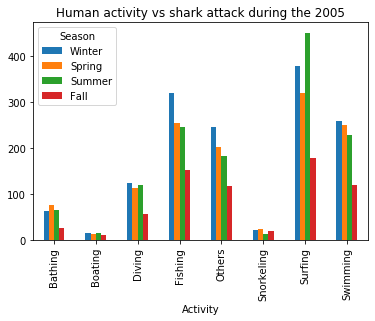

In [40]:
df.groupby('Season')['Activity']\
    .value_counts()\
    .unstack(level=0)\
    .plot.bar(stacked=False)
plt.title(f"Human activity vs shark attack during the {year}")
plt.show()

## 3rd view: indexing the attacks by Activities and Fatal


In [41]:
fatal_activity = df.pivot_table(index=['Activity', 'Fatal'], values=['Date'], aggfunc= len, fill_value=0) 
fatal_activity = fatal_activity.rename(columns= {'Date' : 'Count'})
fatal_activity['Ratio'] = fatal_activity['Count'] * 100 / fatal_activity['Count'].sum() 
fatal_activity = fatal_activity.round({'Ratio' : 2})
df_view3 = fatal_activity.T
display (df_view3)

Activity Bathing       Boating         Diving         Fishing          Others  \
Fatal          0     1       0      1       0       1       0       1       0   
Count     173.00  56.0   26.00  27.00  298.00  110.00  815.00  149.00  533.00   
Ratio       3.72   1.2    0.56   0.58    6.41    2.37   17.53    3.21   11.47   

Activity         Snorkeling        Surfing         Swimming          
Fatal          1          0      1       0       1        0       1  
Count     210.00      66.00  10.00  1204.0  120.00   526.00  325.00  
Ratio       4.52       1.42   0.22    25.9    2.58    11.32    6.99

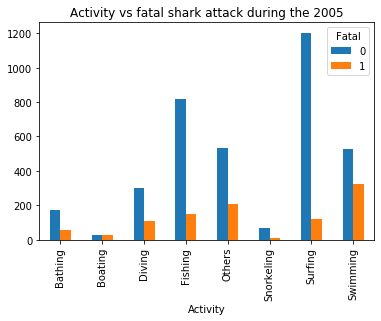

In [35]:
df.groupby('Activity')['Fatal']\
    .value_counts()\
    .unstack(level=1)\
    .plot.bar(stacked=False)
plt.title(f"Activity vs fatal shark attack during the {year}")
plt.show()